In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#importing the necessary libraries
#We need the json library to convert the dataset which is in JSON format
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_json('/content/drive/My Drive/Colab Notebooks/sarcasm.json')

Mounted at /content/drive


In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df = data.drop('article_link',axis  = 1)

In [ ]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.shape

(26709, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [ ]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

<Axes: ylabel='count'>

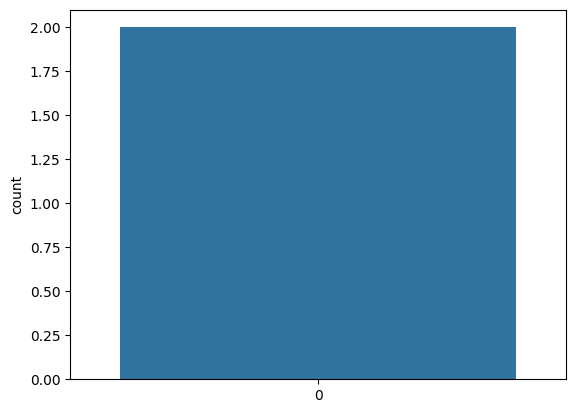

In [ ]:
sns.countplot(df['is_sarcastic'].value_counts())

In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [ ]:
import nltk
nltk.download('stopwords')
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,headline,is_sarcastic,clean_text
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood w...
2,mom starting to fear son's web series closest ...,1,mom start fear son web series close thing gran...
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,rowling wish snape happy birthday magical way


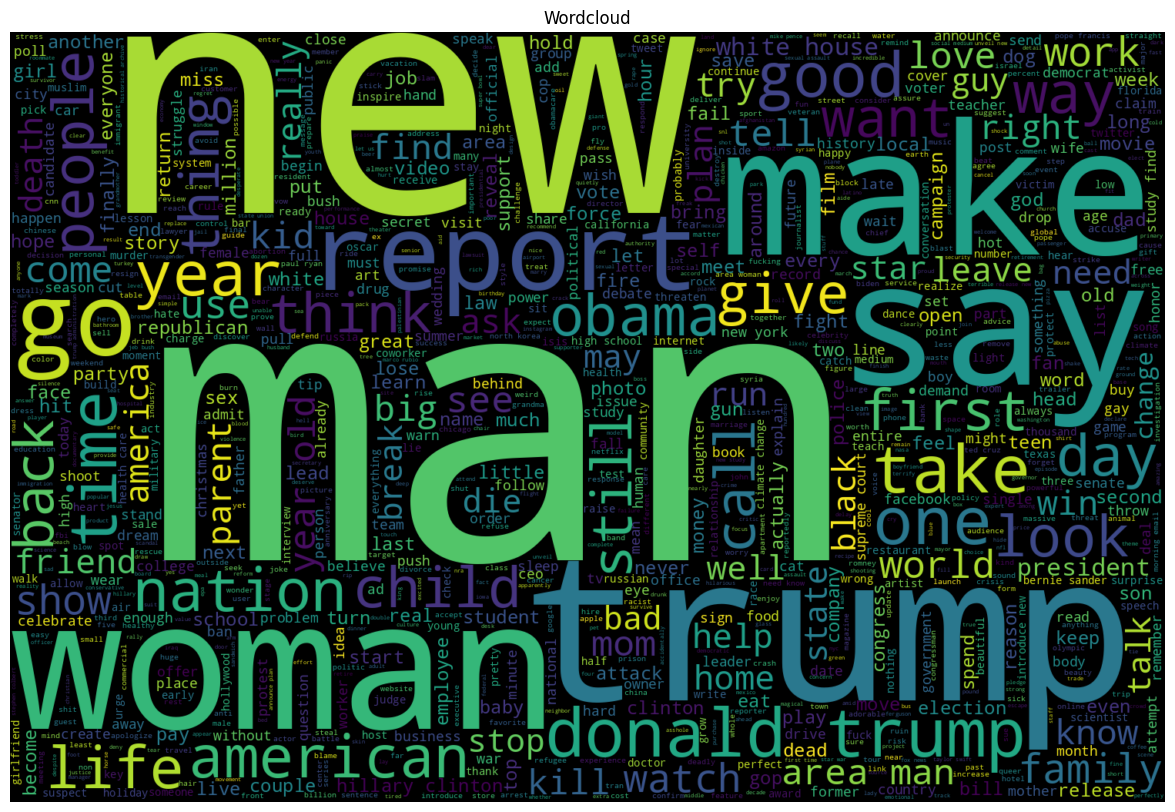

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
X = df.clean_text
y = df.is_sarcastic

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [ ]:
X_train.head()

5874           teen study bible find increase fun religion
15611    montana gop candidate stake company accuse pay...
5303                                  well rank city hotel
2703                 start small business anything routine
6586     domestic terrorist organize online real threat...
Name: clean_text, dtype: object

**LOGISTIC** **REGRESSION**

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3556  888]
 [ 833 2736]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4444
           1       0.75      0.77      0.76      3569

    accuracy                           0.79      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.79      0.79      0.79      8013

Accuracy :  0.785224010982154
Precison :  0.7849935317481723
Recall :  0.785224010982154
F1 :  0.7850715551725028


**NAIVE BAYES**

In [ ]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[4225  219]
 [1742 1827]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      4444
           1       0.89      0.51      0.65      3569

    accuracy                           0.76      8013
   macro avg       0.80      0.73      0.73      8013
weighted avg       0.79      0.76      0.74      8013

Accuracy :  0.7552726818919256
Precison :  0.8386759811761969
Recall :  0.7552726818919256
F1 :  0.7705620425737388


**LINEARSVC**

In [ ]:
from sklearn.svm import LinearSVC
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)
print_metrices(y_pred_svc,y_test)

[[3684  760]
 [ 840 2729]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4444
           1       0.78      0.76      0.77      3569

    accuracy                           0.80      8013
   macro avg       0.80      0.80      0.80      8013
weighted avg       0.80      0.80      0.80      8013

Accuracy :  0.8003244727318108
Precison :  0.8009668582864875
Recall :  0.8003244727318108
F1 :  0.8005654859961147


**DECISION** **TREE**

In [ ]:
clf_dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, random_state=42)
clf_dt.fit(X_tfidf_train, y_train)
y_pred_dt = clf_dt.predict(X_tfidf_test)
print_metrices(y_pred_dt,y_test)

[[4309  135]
 [2864  705]]
              precision    recall  f1-score   support

           0       0.60      0.97      0.74      4444
           1       0.84      0.20      0.32      3569

    accuracy                           0.63      8013
   macro avg       0.72      0.58      0.53      8013
weighted avg       0.71      0.63      0.55      8013

Accuracy :  0.6257331835766878
Precison :  0.8886842838436261
Recall :  0.6257331835766878
F1 :  0.697601182530858


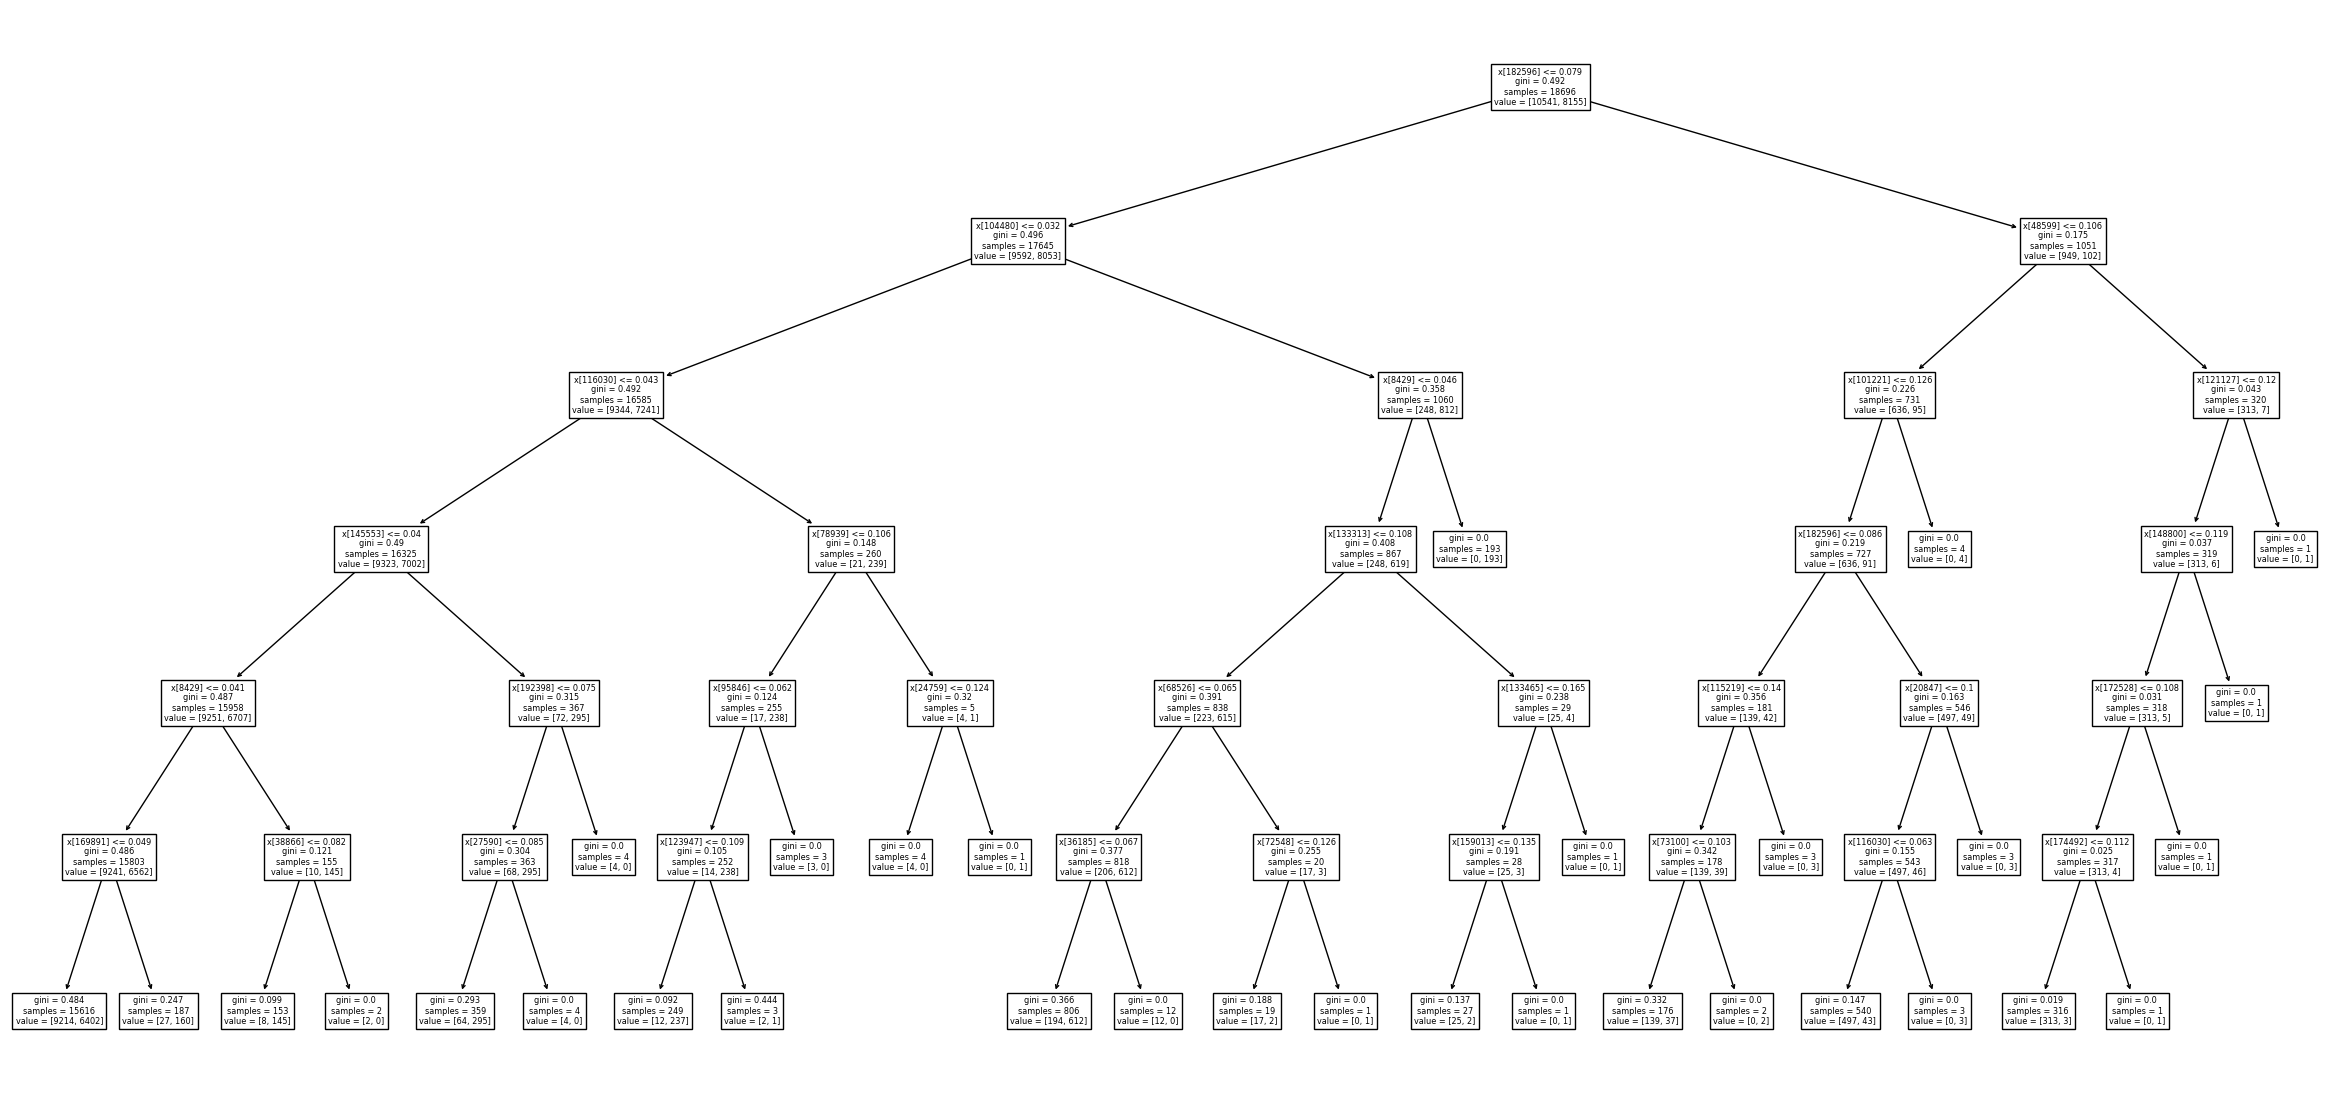

In [ ]:
from sklearn import tree
plt.figure(figsize = (30,14))
tree.plot_tree(clf_dt)
plt.show()

**ENSEMBLE APPROACH**

In [ ]:
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(class_weight='balanced')
clf_rf =   RandomForestClassifier(class_weight='balanced')
clf_svc = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', clf_svc), ('DecisionTree', clf_dt), ('LogReg', clf_lr),('RandromForest', clf_rf)], voting='hard')
voting_clf.fit(X_tfidf_train, y_train)
y_pred_ensemble = voting_clf.predict(X_tfidf_test)

In [ ]:
print_metrices(y_pred_ensemble,y_test)

[[4018  426]
 [1598 1971]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      4444
           1       0.82      0.55      0.66      3569

    accuracy                           0.75      8013
   macro avg       0.77      0.73      0.73      8013
weighted avg       0.76      0.75      0.74      8013

Accuracy :  0.7474104580057407
Precison :  0.7988779582785894
Recall :  0.7474104580057407
F1 :  0.7575071612053454


In [ ]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'LinearSVC' : accuracy_score(y_pred_svc,y_test),
    'Decision Tree' : accuracy_score(y_pred_dt,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    'Ensemble ': accuracy_score(y_pred_ensemble,y_test),
}
print()

In [ ]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

<Axes: xlabel='Model', ylabel='Accuracy'>

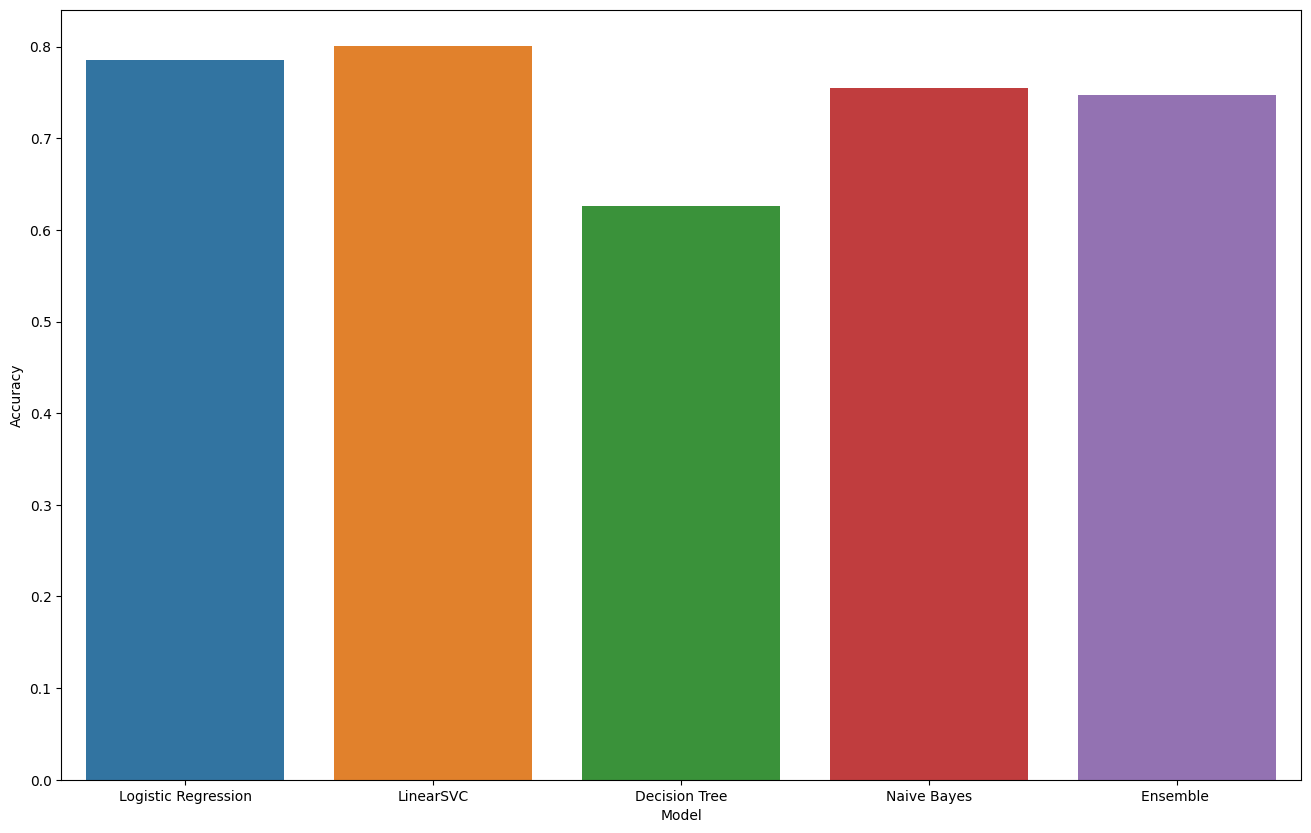

In [ ]:
# fig, ax = plt.subplots()
plt.figure(figsize = (16,10))
sns.barplot(x=acc_df['Model'], y=acc_df['Accuracy'], data=acc_df)

**RNN**

In [ ]:
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words = max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen = max_len,padding = 'post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen = max_len,padding = 'post')

In [ ]:
print(train_sequences[0])
print(train_padded_sequences[0])

[128, 60, 1, 20, 769, 739, 1]
[128  60   1  20 769 739   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GlobalAveragePooling1D
from keras.models import Model
from keras.models import Sequential

In [ ]:
import numpy as np
training_padded = np.array(train_padded_sequences)
training_labels = np.array(y_train)
testing_padded = np.array(test_padded_sequences)
testing_labels = np.array(y_test)

In [ ]:
vocab_size = 10000
embedding_dim = 16

In [ ]:
Model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = Model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
585/585 - 11s - loss: 0.6833 - accuracy: 0.5638 - val_loss: 0.6784 - val_accuracy: 0.5547 - 11s/epoch - 19ms/step
Epoch 2/30
585/585 - 5s - loss: 0.6288 - accuracy: 0.6436 - val_loss: 0.5740 - val_accuracy: 0.7037 - 5s/epoch - 9ms/step
Epoch 3/30
585/585 - 6s - loss: 0.5340 - accuracy: 0.7330 - val_loss: 0.5299 - val_accuracy: 0.7253 - 6s/epoch - 11ms/step
Epoch 4/30
585/585 - 6s - loss: 0.4981 - accuracy: 0.7560 - val_loss: 0.5098 - val_accuracy: 0.7450 - 6s/epoch - 10ms/step
Epoch 5/30
585/585 - 7s - loss: 0.4848 - accuracy: 0.7621 - val_loss: 0.5099 - val_accuracy: 0.7417 - 7s/epoch - 12ms/step
Epoch 6/30
585/585 - 5s - loss: 0.4769 - accuracy: 0.7663 - val_loss: 0.5056 - val_accuracy: 0.7445 - 5s/epoch - 8ms/step
Epoch 7/30
585/585 - 6s - loss: 0.4730 - accuracy: 0.7670 - val_loss: 0.5059 - val_accuracy: 0.7453 - 6s/epoch - 11ms/step
Epoch 8/30
585/585 - 6s - loss: 0.4707 - accuracy: 0.7710 - val_loss: 0.5053 - val_accuracy: 0.7455 - 6s/epoch - 11ms/step
Epoch 9/30
585/5

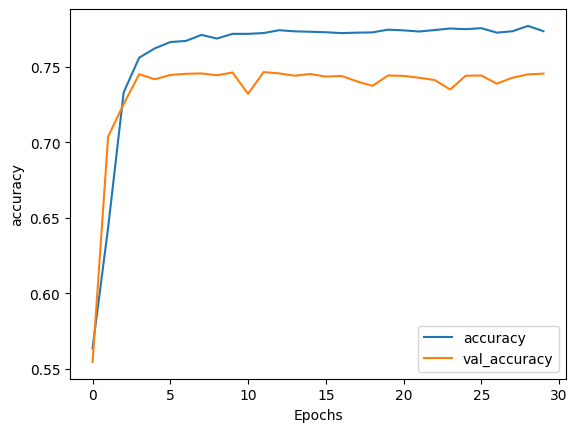

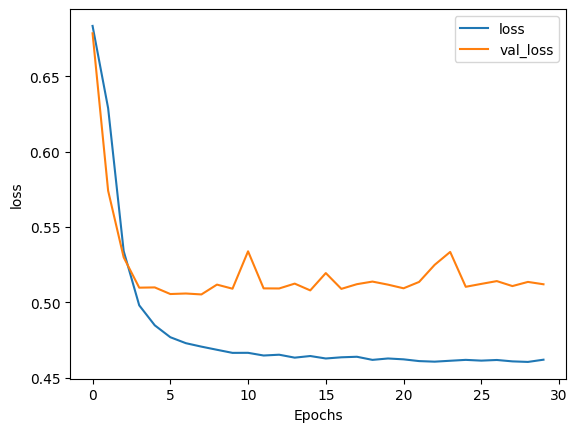

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#importing the necessary libraries
#We need the json library to convert the dataset which is in JSON format
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sarcasm.json')
with open("/content/drive/My Drive/Colab Notebooks/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for itm in datastore:
  sentences.append(itm['headline'])
  labels.append(itm['is_sarcastic'])

#Lets see the first 10 headlines
print(sentences[:10])
print(labels[:10])

Mounted at /content/drive
["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way', "advancing the world's women", 'the fascinating case for eating lab-grown meat', 'this ceo will send your kids to school, if you work for his company', 'top snake handler leaves sinking huckabee campaign', "friday's morning email: inside trump's presser for the ages"]
[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]


In [ ]:
#Now lets divide the data into training data and validation data
train_sentences = sentences[:20000]
test_sentences = sentences[20000:]
train_labels = labels[:20000]
test_labels = labels[20000:]

In [ ]:
#Preparing(tokenizing, converting into sequence, padding) the training data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(word_index)

In [ ]:
train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded_seq = pad_sequences(sequences=train_seq, maxlen = 100, padding='post', truncating='post')
print(train_padded_seq)

In [ ]:
#Preparing the test data
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_padded_seq = pad_sequences(sequences=test_seq, maxlen = 100, padding='post', truncating='post')
print(test_padded_seq.shape)

In [ ]:
import numpy as np
#Converting the data into numpy arrays
train_padded_seq = np.array(train_padded_seq)
train_labels = np.array(train_labels)
test_padded_seq = np.array(test_padded_seq)
test_labels = np.array(test_labels)

In [ ]:
#Defining the model
#Embedding layer converts the 2D tensor into 3D temsor for feeding into the dense layer.
#It has 3 imp parameters: 1. input_dim (the size of the vocabulary) 2. output_dim (the no of neurons in the dense layer or in the output) 3. input_length (length of the sequence)

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 16, input_length =100 ),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_padded_seq, train_labels, epochs = 30, validation_data=(test_padded_seq, test_labels), verbose = 2)

Epoch 1/30
625/625 - 6s - loss: 0.6789 - accuracy: 0.5584 - val_loss: 0.6445 - val_accuracy: 0.5695 - 6s/epoch - 9ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4828 - accuracy: 0.7994 - val_loss: 0.4012 - val_accuracy: 0.8337 - 3s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3306 - accuracy: 0.8684 - val_loss: 0.3621 - val_accuracy: 0.8481 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2754 - accuracy: 0.8917 - val_loss: 0.3456 - val_accuracy: 0.8560 - 3s/epoch - 5ms/step
Epoch 5/30
625/625 - 5s - loss: 0.2379 - accuracy: 0.9076 - val_loss: 0.3445 - val_accuracy: 0.8535 - 5s/epoch - 8ms/step
Epoch 6/30
625/625 - 3s - loss: 0.2097 - accuracy: 0.9202 - val_loss: 0.3522 - val_accuracy: 0.8504 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1885 - accuracy: 0.9270 - val_loss: 0.3617 - val_accuracy: 0.8518 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1677 - accuracy: 0.9384 - val_loss: 0.3668 - val_accuracy: 0.8539 - 3s/epoch - 4ms/step
Epoch 9/30
625/625 - 5s 

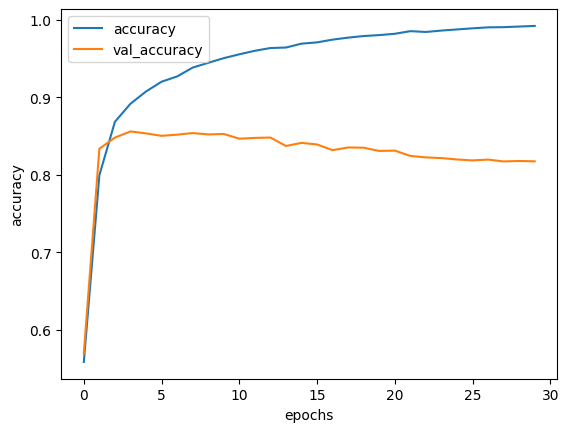

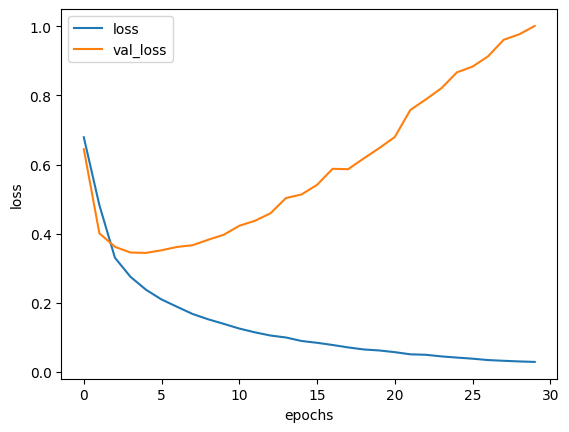

In [ ]:
import matplotlib.pyplot as plt

def plot(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot(history, 'accuracy')
plot(history, 'loss')

In [ ]:
#Testing the model using some sample data...
sentence = [ 'How do you know rbbits ', 'Scientists to kill ducks to see why they are dying', 'Farms protest continues over low MSP']
sequence = tokenizer.texts_to_sequences(sentence)
padded_sequence = pad_sequences(sequences=sequence, maxlen = 100, padding='post', truncating='post')
result = model.predict(padded_sequence)
print(result)

1/1 [==============================] - 0s 88ms/step
[[1.5298387e-03]
 [9.9957913e-01]
 [1.4400987e-04]]
